# <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Unsupervised Approach**</span>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import OrderedDict
from datetime import date
import ast
from itertools import zip_longest
from scipy.stats import kstest, norm
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import math
from sklearn.manifold import TSNE
import umap
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
from scipy import stats
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as sps
import scikit_posthocs as sp

In [26]:
screens = pd.read_csv("screens.csv")
screens

,ContractID,nifs_contestants,contracted_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs,CV,SPD,DIFFP,RD,KURT,SKEW,KSTEST
0,4783825,"['500131210', '500243719', '501326456', '50233...",507011724,2018-08-01,Porto,Porto,Aquisição de serviços,79710000-4,0.111163,0.350965,0.027814,0.235109,-1.499507,-0.026671,0.134592
1,4825056,"['501561358', '503554049', '508682002', '50883...",503554049,2018-09-04,Setubal,Almada,Aquisição de bens móveis,15000000-8,0.196546,0.514925,0.002985,0.012961,-3.049761,-0.366868,0.254944
2,4827836,"['503307483', '504020285', '508604460', '50918...",504020285,2018-08-14,Leiria,Marinha Grande,Aquisição de serviços,77314000-4,0.762421,9.000000,2.000000,0.603023,0.553242,1.017670,0.275882
3,4834603,"['500221103', '500424128', '502755814', '50758...",500221103,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.034250,0.081249,0.050044,3.163463,1.421385,-1.296284,0.246444
4,4834611,"['500424128', '502755814', '505483440', '50758...",500424128,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.593060,14.145039,0.101310,0.039002,9.602099,2.718020,0.225003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24126,10428459,"['500701490', '500901694', '501642277', '50359...",500901694,2023-12-28,Aveiro,Espinho,Aquisição de bens móveis,35121000-8,0.095072,0.282495,0.030839,0.313414,-1.633944,-0.563764,0.238816
24127,10428460,"['500166099', '501333606', '503369489', '50487...",513718737,2023-12-22,Aveiro,Ilhavo,Empreitadas de obras públicas,45232460-4,0.119184,0.335092,0.018514,0.139065,-0.896794,0.851456,0.210851
24128,10428464,"['502117281', '502629428', '502771496', '51478...",502629428,2023-12-27,Lisboa,Loures,Aquisição de serviços,90000000-7,0.172900,0.444219,0.061191,0.291456,3.164927,1.726690,0.346329
24129,10428567,"['503480045', '510533515']",510533515,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3,0.307192,0.810687,0.021505,0.051512,-5.292782,0.118826,0.296740


In [27]:
screens_scaled = pd.read_csv("screens_scaled.csv")
screens_scaled

,CV,SPD,DIFFP,RD,KURT,SKEW,KSTEST
0,-0.802198,-0.306868,-0.198290,-0.067310,-0.618084,-0.102262,-1.803546
1,-0.634441,-0.306867,-0.198291,-0.072351,-1.001458,-0.349619,-0.383166
2,0.477366,-0.306808,-0.198262,-0.058962,-0.110444,0.657079,-0.136065
3,-0.953313,-0.306870,-0.198290,-0.000862,0.104246,-1.025399,-0.483479
4,0.144614,-0.306772,-0.198289,-0.071760,2.127317,1.893405,-0.736525
...,...,...,...,...,...,...,...
24126,-0.833812,-0.306869,-0.198290,-0.065533,-0.651330,-0.492782,-0.573512
24127,-0.786437,-0.306868,-0.198291,-0.069489,-0.469034,0.536225,-0.903549
24128,-0.680900,-0.306868,-0.198290,-0.066031,0.535420,1.172608,0.695347
24129,-0.417048,-0.306865,-0.198291,-0.071476,-1.556152,0.003530,0.110105


## <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Gaussian Mixture Clustering Model (GMCM)**</span>

`Gaussian Mixture Clustering Model (GMCM):`

The Gaussian Mixture Clustering Model (GMCM) is a probabilistic clustering method that assumes your data comes from a mixture of several Gaussian (normal) distributions, each representing a different cluster.

GMCM learns clusters using the **Expectation–Maximization (EM) algorithm**, which produces soft assignments: instead of saying “this tender belongs to cluster 2”, GMCM gives probabilities like “this tender is 70% cluster 2, 25% cluster 1, and 5% cluster 3”. This is extremely important in cartel detection because suspicious behavior is not binary, there is a spectrum between competitive, semi-suspicious, and highly suspicious patterns. GMCM naturally captures this uncertainty and gives a probabilistic risk view of each tender.

Resumindo o processo para o GMCM:
- **E-step (Expectation):** dado o valor atual dos parâmetros (médias, covariâncias e pesos dos clusters), o algoritmo calcula, para cada observação, as probabilidades de pertencer a cada um dos K clusters (as “responsabilidades”).
- **M-step (Maximization):** usando essas probabilidades, atualiza os parâmetros das K gaussianas (novas médias, novas covariâncias e novos pesos) maximizando a log-verosimilhança esperada.

### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Ajustar o GMCM com EM e escolher K + tipo de covariância via BIC**</span>

`Bayesian Information Criterion (BIC):` O BIC é um critério que escolhe o melhor modelo equilibrando ajuste aos dados e simplicidade, escolhendo o modelo com o menor valor de BIC.

$$ 
\text{BIC} = -2 \ln(L) + k \ln(n)
$$

onde:

* **(L)** = *maximum likelihood* do modelo (quão bem o modelo encaixa nos dados)
* **(k)** = número de parâmetros do modelo
* **(n)** = número de observações


Tabela BIC por K e tipo de covariância:
covariance           diag           full      spherical           tied
K                                                                     
1           479506.957963  446901.102321  479446.410448  446901.102321
2          -135493.605471 -193436.301333  381152.660038  419593.502161
3          -229990.483251 -284410.536632  340512.773327  369451.167219
4          -274617.998206 -315670.291122  318174.638944  362198.436546
5          -303943.397938 -366562.532116  302518.344820  350260.417629
6          -323467.665444 -390277.609296  289676.092955  319041.338520
7          -333957.293664 -394639.777946  278344.788986  310777.192580
8          -344253.268569 -405340.605045  273551.550834  305722.121149


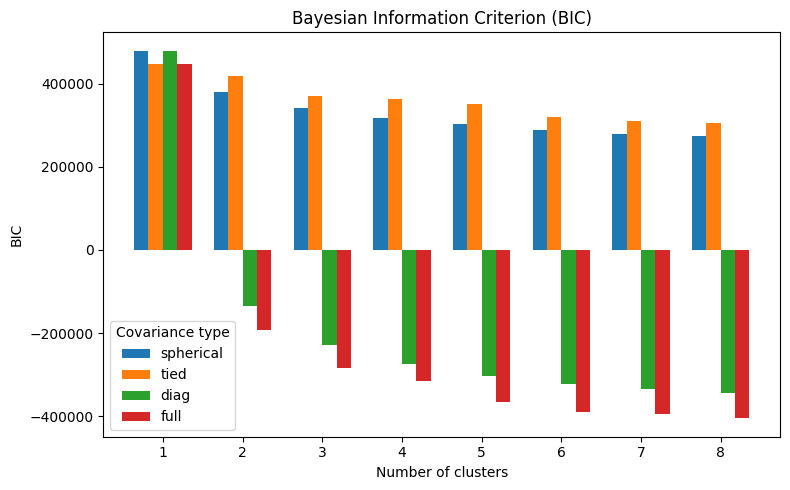

In [28]:
# Intervalo de número de clusters a testar
K_range = range(1, 9)          
cov_types = ['spherical', 'tied', 'diag', 'full']

bic_rows = []          # para guardar todos os resultados

for cov in cov_types:
    for K in K_range:
        gmm = GaussianMixture(
            n_components=K,
            covariance_type=cov,
            random_state=42,
            n_init=5,
            max_iter=500
        )
        gmm.fit(screens_scaled)
        bic = gmm.bic(screens_scaled)
        bic_rows.append({
            "K": K,
            "covariance": cov,
            "BIC": bic
        })

# TABELA DE BIC 
bic_df = pd.DataFrame(bic_rows)

# Tabela em formato "wide": linhas = K, colunas = tipo de covariância
bic_table = bic_df.pivot(index="K", columns="covariance", values="BIC")
print("\nTabela BIC por K e tipo de covariância:")
print(bic_table)

# barras agrupadas
plt.figure(figsize=(8, 5))

# posição base no eixo X
x = np.arange(len(K_range))
width = 0.18  # largura de cada barra

# desenhar uma série de barras para cada tipo de covariância
for i, cov in enumerate(cov_types):
    plt.bar(
        x + i * width,
        bic_table[cov].values,
        width=width,
        label=cov
    )

plt.xticks(x + width * (len(cov_types)-1) / 2, K_range)
plt.xlabel("Number of clusters")
plt.ylabel("BIC")
plt.title("Bayesian Information Criterion (BIC)")
plt.legend(title="Covariance type")
plt.tight_layout()
plt.show()

A covariância FULL tem os menores BIC ao longo de quase todos os valores de K.
Portanto, o modelo GMCM deve usar `covariance_type="full"`.

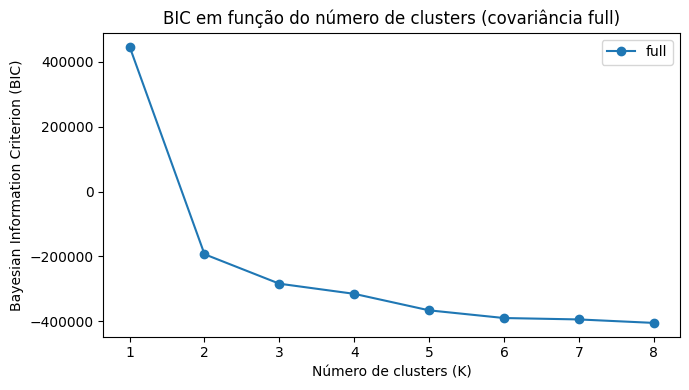

In [29]:
# Série com os BICs para covariância 'full'
bic_full = bic_table['full']

# K ótimo para 'full'
best_K_full = bic_full.idxmin()
best_BIC_full = bic_full.min()

plt.figure(figsize=(7, 4))

# linha BIC vs K
plt.plot(bic_full.index, bic_full.values, marker='o', linestyle='-', label='full')

plt.xlabel("Número de clusters (K)")
plt.ylabel("Bayesian Information Criterion (BIC)")
plt.title("BIC em função do número de clusters (covariância full)")
plt.legend()
plt.tight_layout()
plt.show()

- Quanto mais baixo o BIC, melhor. No entanto, a apartir de k=6 o BIC começa a estabilizar por isso apesar de com um número maior de clusters conseguirmos obter melhor BIC (ou seja, mais baixo), vamos escolher um número de clusters de 6.
- Mais clusters complicariam sem aumentar substancialmente a interpretabilidade.

**Conclusion:**

> Para selecionar o número de clusters e o tipo de covariância do Gaussian Mixture Clustering Model (GMCM), estimámos modelos com $K \in [1,8]$  e quatro especificações de matriz de covariância (spherical, tied, diagonal e full), avaliando cada combinação através do critério de informação bayesiano (BIC). 

> O primeiro gráfico mostra a evolução do BIC para todos os tipos de covariâncias, onde podemos observar que a covariância FULL tem os menores BIC ao longo de quase todos os valores de K.

> O segundo gráfico mostra a evolução do BIC  considerando apenas a covariância *full*, onde se observa uma redução acentuada até cerca de K = 6, a partir da qual os ganhos marginais se tornam reduzidos.

> Com base neste comportamento do BIC, optámos por fixar K = 6 como número de clusters e a covariance_type="full" para a análise subsequente.

Agora vamos treinar o modelo com k=6:

In [30]:
gmm = GaussianMixture(
    n_components=6, # 6 clusters
    covariance_type="full",   
    random_state=42
)

gmm.fit(screens_scaled)   # usamos a versão standardizada do dataset

,n_components,6
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,42


In [31]:
clusters = gmm.predict(screens_scaled)

In [32]:
# Juntar os clusters ao DataFrame original (não standardizado) !!!!
df_clusters = screens.copy()
df_clusters["cluster"] = clusters

In [33]:
# Ver quantos elementos tem cada cluster
df_clusters["cluster"].value_counts()

cluster
1    8706
2    8574
3    2770
0    1469
5    1430
4    1182
Name: count, dtype: int64

In [34]:
df_clusters

,ContractID,nifs_contestants,contracted_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs,CV,SPD,DIFFP,RD,KURT,SKEW,KSTEST,cluster
0,4783825,"['500131210', '500243719', '501326456', '50233...",507011724,2018-08-01,Porto,Porto,Aquisição de serviços,79710000-4,0.111163,0.350965,0.027814,0.235109,-1.499507,-0.026671,0.134592,1
1,4825056,"['501561358', '503554049', '508682002', '50883...",503554049,2018-09-04,Setubal,Almada,Aquisição de bens móveis,15000000-8,0.196546,0.514925,0.002985,0.012961,-3.049761,-0.366868,0.254944,1
2,4827836,"['503307483', '504020285', '508604460', '50918...",504020285,2018-08-14,Leiria,Marinha Grande,Aquisição de serviços,77314000-4,0.762421,9.000000,2.000000,0.603023,0.553242,1.017670,0.275882,2
3,4834603,"['500221103', '500424128', '502755814', '50758...",500221103,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.034250,0.081249,0.050044,3.163463,1.421385,-1.296284,0.246444,1
4,4834611,"['500424128', '502755814', '505483440', '50758...",500424128,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.593060,14.145039,0.101310,0.039002,9.602099,2.718020,0.225003,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24126,10428459,"['500701490', '500901694', '501642277', '50359...",500901694,2023-12-28,Aveiro,Espinho,Aquisição de bens móveis,35121000-8,0.095072,0.282495,0.030839,0.313414,-1.633944,-0.563764,0.238816,1
24127,10428460,"['500166099', '501333606', '503369489', '50487...",513718737,2023-12-22,Aveiro,Ilhavo,Empreitadas de obras públicas,45232460-4,0.119184,0.335092,0.018514,0.139065,-0.896794,0.851456,0.210851,2
24128,10428464,"['502117281', '502629428', '502771496', '51478...",502629428,2023-12-27,Lisboa,Loures,Aquisição de serviços,90000000-7,0.172900,0.444219,0.061191,0.291456,3.164927,1.726690,0.346329,2
24129,10428567,"['503480045', '510533515']",510533515,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3,0.307192,0.810687,0.021505,0.051512,-5.292782,0.118826,0.296740,2


### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Clusters Visualizations: PCA, TSNE and UMAP**</span>

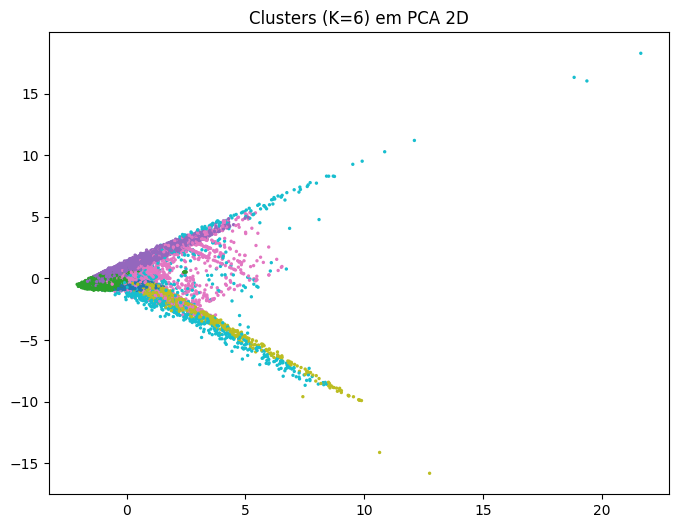

In [35]:
# Ver clusters visualmente com PCA (2D)

pca = PCA(n_components=2)
coords = pca.fit_transform(screens_scaled)

plt.figure(figsize=(8,6))
plt.scatter(coords[:,0], coords[:,1], c=clusters, cmap='tab10', s=2)
plt.title("Clusters (K=6) em PCA 2D")
plt.show()

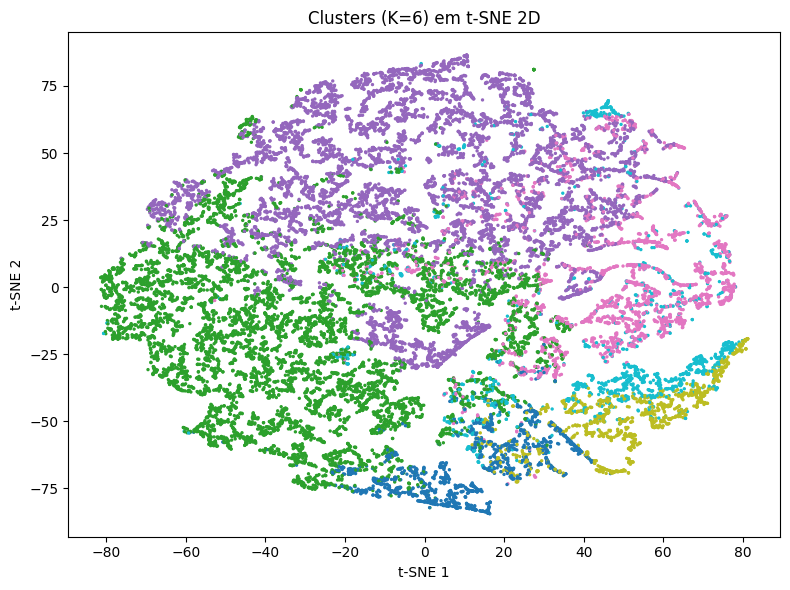

In [36]:
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42)

tsne_coords = tsne.fit_transform(screens_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_coords[:, 0], tsne_coords[:, 1],
            c=clusters, cmap='tab10', s=2)
plt.title("Clusters (K=6) em t-SNE 2D")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout()
plt.show()

c:\Users\beatr\Desktop\NOVA IMS\Bolsa de Investigação\RISKGUARD\riskguard2\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


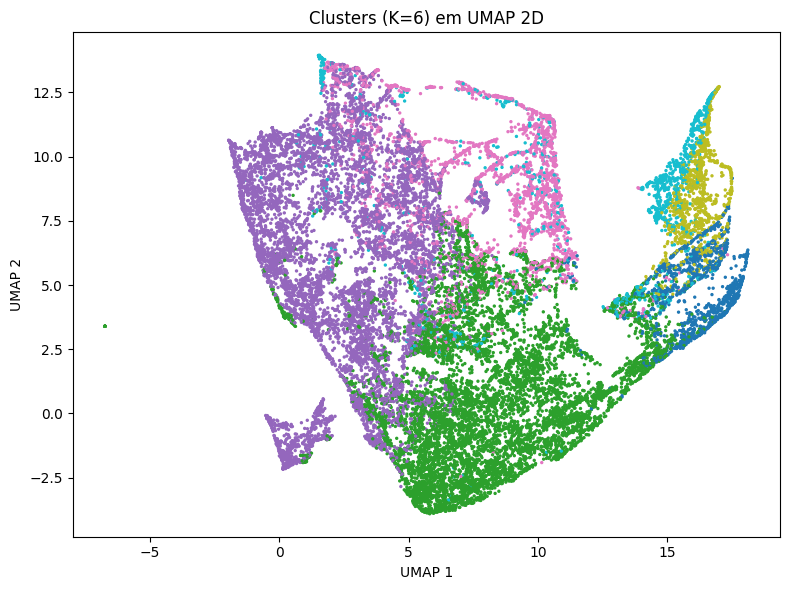

In [37]:
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=30,   # controla “local” vs “global”
    min_dist=0.1,
    random_state=42
)

umap_coords = umap_model.fit_transform(screens_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(umap_coords[:, 0], umap_coords[:, 1],
            c=clusters, cmap='tab10', s=2)
plt.title("Clusters (K=6) em UMAP 2D")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()

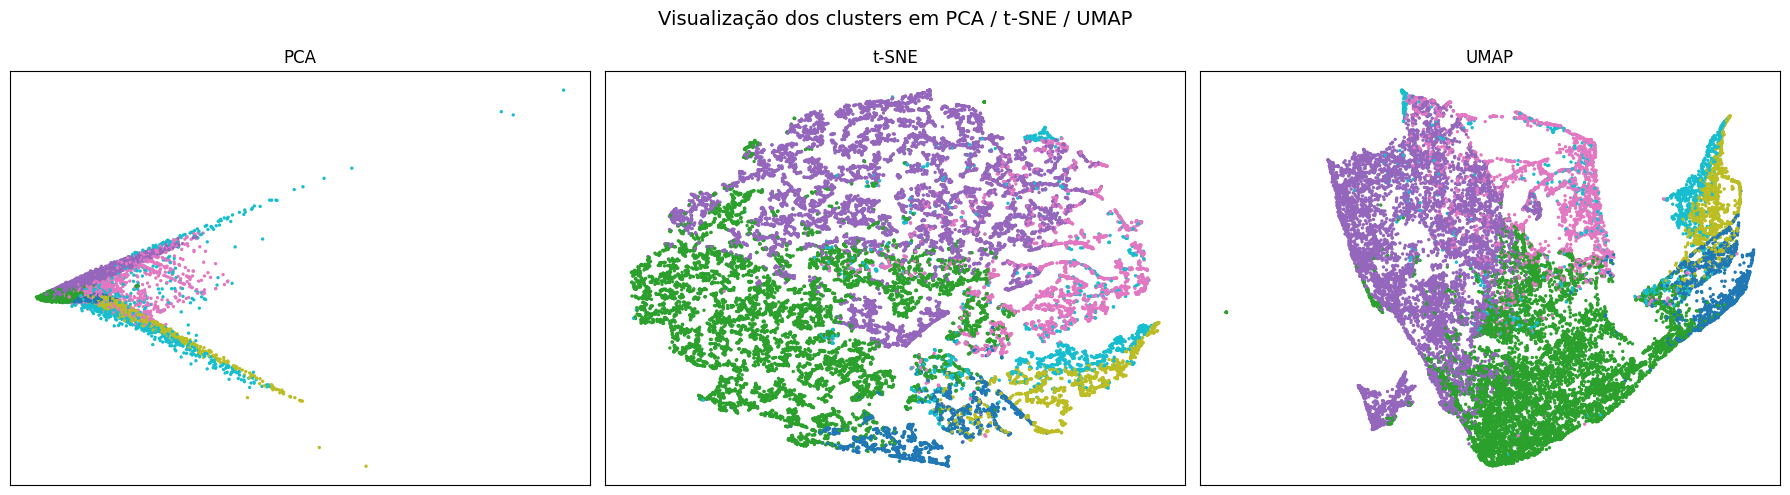

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(coords[:, 0], coords[:, 1],
                c=clusters, cmap='tab10', s=2)
axes[0].set_title("PCA")

axes[1].scatter(tsne_coords[:, 0], tsne_coords[:, 1],
                c=clusters, cmap='tab10', s=2)
axes[1].set_title("t-SNE")

axes[2].scatter(umap_coords[:, 0], umap_coords[:, 1],
                c=clusters, cmap='tab10', s=2)
axes[2].set_title("UMAP")

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Visualização dos clusters em PCA / t-SNE / UMAP", fontsize=14)
plt.tight_layout()
plt.show()

### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Summary Statistics por Cluster**</span>

In [39]:
colunas_screens = ['CV', 'SPD', 'DIFFP', 'RD', 'KURT', 'SKEW', 'KSTEST']

# Estatísticas por cluster
stats = (
    df_clusters
    .groupby("cluster")[colunas_screens]
    .agg(['mean','median', 'std', 'min', 'max'])
    .round(3)
)

# Achatar para formato longo (cluster, Screen, stats)
tabela = (
    stats
    .stack(level=0)                                # índice -> (cluster, Screen)
    .rename_axis(['cluster', 'Screen'])
    .reset_index()
    .rename(columns={
        'mean': 'Mean',
        'median': 'Median',
        'std':  'Std. Dev.',
        'min':  'Min',
        'max':  'Max'}))

# Gerar uma tabela por cluster 
for k in sorted(df_clusters["cluster"].unique()):
    print(f"\n===== Cluster {k} =====\n")
    tabela_k = (
        tabela[tabela['cluster'] == k]
        .drop(columns='cluster')
        .set_index('Screen'))
    display(tabela_k)       


===== Cluster 0 =====



C:\Users\beatr\AppData\Local\Temp\ipykernel_28708\523155733.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stats


,Mean,Median,Std. Dev.,Min,Max
Screen,,,,,
CV,0.305,0.302,0.220,0.000,0.787
DIFFP,190.018,1.293,395.762,0.000,2302.030
KSTEST,0.364,0.366,0.050,0.169,0.514
KURT,4.256,3.882,1.716,-2.110,15.568
RD,11.877,7.759,12.073,0.000,118.613
SKEW,-1.993,-1.948,0.354,-3.883,-0.699
SPD,255.266,1.918,525.728,0.000,3078.400



===== Cluster 1 =====



,Mean,Median,Std. Dev.,Min,Max
Screen,,,,,
CV,0.250,0.157,0.232,0.000,1.080
DIFFP,2.112,0.092,15.889,0.000,320.906
KSTEST,0.228,0.223,0.063,0.058,0.838
KURT,-0.460,-0.776,1.683,-4.263,8.536
RD,1.047,0.740,1.096,0.000,6.155
SKEW,-0.359,-0.297,0.607,-2.419,1.415
SPD,12.396,0.556,58.444,0.000,946.368



===== Cluster 2 =====



,Mean,Median,Std. Dev.,Min,Max
Screen,,,,,
CV,0.573,0.375,0.522,0.000,3.369
DIFFP,0.729,0.053,5.887,0.000,184.000
KSTEST,0.303,0.296,0.076,0.111,0.528
KURT,1.214,1.103,3.683,-6.000,20.110
RD,0.180,0.087,0.219,0.000,1.401
SKEW,1.294,1.228,0.773,-0.282,4.402
SPD,38.184,1.429,105.545,0.000,1112.750



===== Cluster 3 =====



,Mean,Median,Std. Dev.,Min,Max
Screen,,,,,
CV,1.152,1.037,0.521,0.224,3.305
DIFFP,22.300,0.000,72.058,0.000,672.360
KSTEST,0.331,0.322,0.072,0.087,0.530
KURT,-0.329,-1.279,3.808,-6.000,21.245
RD,0.006,0.000,0.026,0.000,0.251
SKEW,0.296,0.028,1.259,-2.808,4.576
SPD,189391.890,77352.018,256187.478,2.204,999999.000



===== Cluster 4 =====



,Mean,Median,Std. Dev.,Min,Max
Screen,,,,,
CV,0.550,0.562,0.117,0.007,0.699
DIFFP,152096.303,86317.250,181975.942,0.018,945528.400
KSTEST,0.396,0.402,0.044,0.272,0.504
KURT,4.984,4.611,1.627,2.078,13.090
RD,38.373,12.800,195.011,3.665,4225.988
SKEW,-2.175,-2.104,0.326,-3.575,-1.512
SPD,175812.237,105438.820,202136.889,0.018,999999.000



===== Cluster 5 =====



,Mean,Median,Std. Dev.,Min,Max
Screen,,,,,
CV,0.808,0.617,0.679,0.058,8.062
DIFFP,103212.916,27899.000,158658.245,0.000,781736.230
KSTEST,0.305,0.302,0.073,0.102,0.530
KURT,4.545,2.928,9.535,-6.000,156.657
RD,2.638,2.225,2.425,0.000,14.173
SKEW,-0.377,-0.965,1.974,-3.917,11.461
SPD,228922.263,119999.000,265590.477,0.343,999999.000


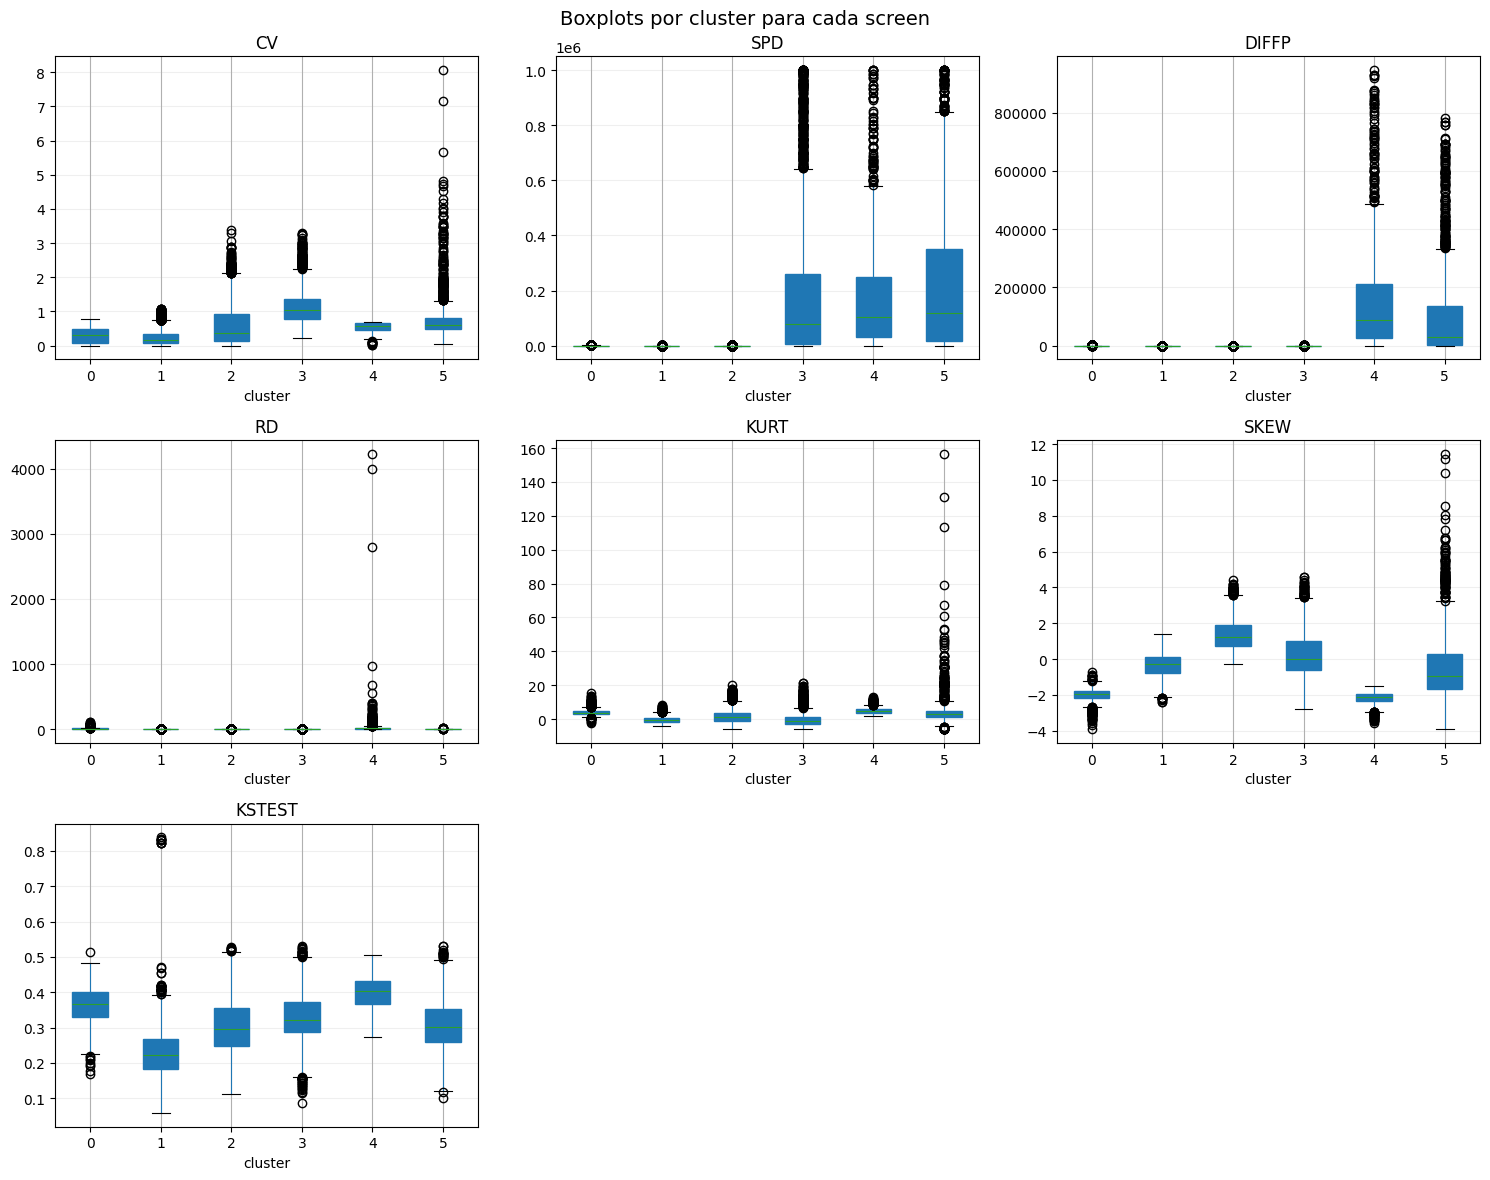

In [40]:
colunas_screens = ['CV', 'SPD', 'DIFFP', 'RD', 'KURT', 'SKEW', 'KSTEST']
n_clusters = 6   # clusters 0..5

n_screens = len(colunas_screens)
n_cols = 3
n_rows = math.ceil(n_screens / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, screen in enumerate(colunas_screens):
    ax = axes[i]

    # fazer o boxplot com patch_artist=True para podermos mudar as cores
    df_clusters.boxplot(
        column=screen,
        by='cluster',
        ax=ax,
        patch_artist=True)

    # ticks 0–5 em todos
    ax.set_xticks(range(1, n_clusters + 1))
    ax.set_xticklabels(range(n_clusters))

    # grid mais suave / transparente
    ax.grid(True, axis='y', alpha=0.2)   # grelha só no eixo y

    # dar cor às caixas do boxplot
    for box in ax.artists:
        box.set_facecolor("#ccccff")     # escolher a cor 
        box.set_alpha(0.7)               # transparência da caixa
        box.set_edgecolor("black")
        box.set_linewidth(0.8)

    for line in ax.lines:
        line.set_linewidth(0.8)

# apagar eixos vazios 
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Boxplots por cluster para cada screen", fontsize=14)
plt.tight_layout()
plt.show()

### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Statistical Tests for Cluster Differences**</span>

Are the clusters statistically different from each other in terms of each screen?

In [41]:
colunas_screens = ['CV', 'SPD', 'DIFFP', 'RD', 'KURT', 'SKEW', 'KSTEST']

#### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**ANOVA (Parametric Model)**</span>

One possible issue is that the screen variables might exhibit similar values across all GMCM clusters, which would indicate that the clustering did not capture distinct bidding behaviors. To assess whether this is the case, we perform a **one-way ANOVA** to test if the mean of each screen differs significantly across clusters.

In [42]:
anova_results = []

for screen in colunas_screens:
    
    model = smf.ols(f"{screen} ~ C(cluster)", data=df_clusters).fit()
    adj_r2 = model.rsquared_adj
    
    groups = [df_clusters[df_clusters['cluster'] == c][screen]
              for c in df_clusters['cluster'].unique()]
    
    f_stat, p_val = sps.f_oneway(*groups)   
    
    anova_results.append({
        'Screen': screen,
        'Adj R-squared': adj_r2,
        'F-statistic': f_stat,
        'p-value': p_val
    })

anova_table = pd.DataFrame(anova_results)
anova_table

,Screen,Adj R-squared,F-statistic,p-value
0,CV,0.311762,2187.113518,0.000000e+00
1,SPD,0.331611,2395.341971,0.000000e+00
2,DIFFP,0.336645,2450.137176,0.000000e+00
3,RD,0.036505,183.846853,8.847656e-193
4,KURT,0.192815,1153.803412,0.000000e+00
5,SKEW,0.592250,7010.677907,0.000000e+00
6,KSTEST,0.352293,2625.902301,0.000000e+00


- The one-way ANOVA results show that all statistical screens differ significantly across clusters (p < 0.0001). 
- This confirms that the GMCM algorithm partitioned the Portuguese tenders into behaviorally distinct groups, as intended. 
- Adjusted R² values indicate that skewness (Adj R² = 0.59), KS-test statistics (Adj R² = 0.35), and dispersion-based screens such as CV, SPD, and DIFFP (Adj R² with 0.31–0.33) are the variables most strongly explained by cluster membership.

#### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Tukey’s Test (Parametric Model)**</span>

ANOVA tells us only that some clusters differ for a given screen, but not which ones. Because the model produces six clusters, we need to determine which pairs of clusters actually show significant differences. To do so, we conduct **Tukey’s posthoc test**, which provides a detailed comparison between all cluster pairs.

In [43]:
def highlight_not_reject(row):
    # reject comes as bool or string depending on version
    val = row['reject']
    is_false = (val is False) or (str(val) == 'False')
    if is_false:
        return ['background-color: red'] * len(row)  
    else:
        return [''] * len(row)

tukey_results = {}

for screen in colunas_screens:
    tukey = pairwise_tukeyhsd(endog=df_clusters[screen],
                              groups=df_clusters['cluster'],
                              alpha=0.05)
    
    # convert summary to DataFrame
    df_tukey = pd.DataFrame(
        tukey.summary().data[1:],   # skip header row
        columns=tukey.summary().data[0]
    )
    
    tukey_results[screen] = df_tukey

# print with red highlight for reject == False
for screen, df_result in tukey_results.items():
    print(f"\n\n### Tukey HSD results for {screen} ###")
    display(df_result.style.apply(highlight_not_reject, axis=1))

c:\Users\beatr\Desktop\NOVA IMS\Bolsa de Investigação\RISKGUARD\riskguard2\lib\site-packages\scipy\integrate\_quadpack_py.py:1260: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,




### Tukey HSD results for CV ###


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-0.054200,0.000100,-0.088200,-0.020300,True
1,0,2,0.268200,0.000000,0.234200,0.302100,True
2,0,3,0.846900,0.000000,0.808100,0.885800,True
3,0,4,0.245100,0.000000,0.198100,0.292100,True
4,0,5,0.503800,0.000000,0.459100,0.548500,True
5,1,2,0.322400,0.000000,0.304100,0.340700,True
6,1,3,0.901200,0.000000,0.874900,0.927400,True
7,1,4,0.299400,0.000000,0.262100,0.336700,True
8,1,5,0.558000,0.000000,0.523700,0.592400,True
9,2,3,0.578800,0.000000,0.552500,0.605100,True




### Tukey HSD results for SPD ###


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-242.869800,1.000000,-9655.787400,9170.047800,False
1,0,2,-217.081600,1.000000,-9640.454300,9206.291200,False
2,0,3,189136.623900,0.000000,178365.569900,199907.677900,True
3,0,4,175556.971000,0.000000,162517.424000,188596.518000,True
4,0,5,228666.997500,0.000000,216269.830000,241064.165000,True
5,1,2,25.788200,1.000000,-5051.690100,5103.266500,False
6,1,3,189379.493600,0.000000,182099.628600,196659.358700,True
7,1,4,175799.840700,0.000000,165455.247100,186144.434400,True
8,1,5,228909.867300,0.000000,219387.756500,238431.978000,True
9,2,3,189353.705500,0.000000,182060.326800,196647.084100,True




### Tukey HSD results for DIFFP ###


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-187.906300,1.000000,-4672.391700,4296.579100,False
1,0,2,-189.288800,1.000000,-4678.755200,4300.177600,False
2,0,3,-167.717900,1.000000,-5299.244200,4963.808400,False
3,0,4,151906.285300,0.000000,145694.007600,158118.562900,True
4,0,5,103022.898100,0.000000,97116.661700,108929.134400,True
5,1,2,-1.382500,1.000000,-2420.385600,2417.620600,False
6,1,3,20.188400,1.000000,-3448.071900,3488.448700,False
7,1,4,152094.191600,0.000000,147165.838800,157022.544400,True
8,1,5,103210.804400,0.000000,98674.297400,107747.311400,True
9,2,3,21.570900,1.000000,-3453.127500,3496.269300,False




### Tukey HSD results for RD ###


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-10.829500,0.000000,-14.306900,-7.352000,True
1,0,2,-11.696500,0.000000,-15.177800,-8.215200,True
2,0,3,-11.870400,0.000000,-15.849500,-7.891200,True
3,0,4,26.496900,0.000000,21.679700,31.314100,True
4,0,5,-9.238400,0.000000,-13.818300,-4.658500,True
5,1,2,-0.867000,0.775600,-2.742800,1.008700,False
6,1,3,-1.040900,0.880300,-3.730300,1.648500,False
7,1,4,37.326400,0.000000,33.504800,41.148000,True
8,1,5,1.591000,0.791300,-1.926700,5.108800,False
9,2,3,-0.173900,1.000000,-2.868300,2.520500,False




### Tukey HSD results for KURT ###


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-4.715900,0.000000,-5.007900,-4.423800,True
1,0,2,-3.042000,0.000000,-3.334400,-2.749600,True
2,0,3,-4.585000,0.000000,-4.919200,-4.250800,True
3,0,4,0.728100,0.000000,0.323500,1.132600,True
4,0,5,0.289100,0.265600,-0.095500,0.673800,False
5,1,2,1.673800,0.000000,1.516300,1.831400,True
6,1,3,0.130800,0.564700,-0.095000,0.356700,False
7,1,4,5.443900,0.000000,5.123000,5.764900,True
8,1,5,5.005000,0.000000,4.709600,5.300400,True
9,2,3,-1.543000,0.000000,-1.769300,-1.316700,True




### Tukey HSD results for SKEW ###


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,1.633900,0.000000,1.563300,1.704500,True
1,0,2,3.287000,0.000000,3.216300,3.357700,True
2,0,3,2.289200,0.000000,2.208400,2.370000,True
3,0,4,-0.181600,0.000000,-0.279400,-0.083800,True
4,0,5,1.615800,0.000000,1.522800,1.708800,True
5,1,2,1.653100,0.000000,1.615000,1.691200,True
6,1,3,0.655300,0.000000,0.600700,0.709900,True
7,1,4,-1.815500,0.000000,-1.893100,-1.737900,True
8,1,5,-0.018100,0.979200,-0.089500,0.053300,False
9,2,3,-0.997800,0.000000,-1.052500,-0.943100,True




### Tukey HSD results for KSTEST ###


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-0.135700,0.000000,-0.141200,-0.130200,True
1,0,2,-0.060800,0.000000,-0.066300,-0.055300,True
2,0,3,-0.032500,0.000000,-0.038800,-0.026300,True
3,0,4,0.032300,0.000000,0.024700,0.039900,True
4,0,5,-0.058100,0.000000,-0.065300,-0.050900,True
5,1,2,0.074900,0.000000,0.071900,0.077800,True
6,1,3,0.103200,0.000000,0.098900,0.107400,True
7,1,4,0.168000,0.000000,0.162000,0.174000,True
8,1,5,0.077600,0.000000,0.072100,0.083200,True
9,2,3,0.028300,0.000000,0.024000,0.032500,True


Tukey’s posthoc test allows us to identify which pairs of clusters differ significantly for each screen.
This complements the ANOVA results by pinpointing the specific sources of statistical heterogeneity across clusters.

This result shows that, for the following screens, there is no statistically significant difference between some clusters: (considering a level of significance of 0.05)

- CV: clusters 2 and 4
- SPD: clusters 1,2 and 5
- DIFFP: clusters 0,1,2 and 5
- RD: clusters 0,2,3 and 5
- KURT: clusters 0 and 5, clusters 1 and 3 
- SKEW: clusters 3 and 5
- KSTEST: clusters 2 and 3

Overall, the results confirm that the GMCM algorithm successfully identified clusters with statistically distinct bidding patterns, while simultaneously revealing meaningful behavioural proximities between certain cluster pairs.

#### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Kruskal–Wallis (Non-Parametric Model)**</span>

One potential concern is that the bid-screen variables may present similar distributions across all GMCM clusters, which would suggest that the clustering failed to capture distinct bidding behaviors. Since bid-screen indicators are often skewed and may violate the normality and homoscedasticity assumptions required by parametric tests, we employ the Kruskal–Wallis test, a non-parametric alternative to one-way ANOVA, to assess whether the distributions of each screen differ significantly across clusters.

This test evaluates whether at least one cluster exhibits systematically higher or lower values than the others, without assuming any specific underlying distribution, making it particularly suitable for procurement data.

In [44]:
kw_results = []

for screen in colunas_screens:
    # grupos por cluster
    groups = [
        df_clusters.loc[df_clusters["cluster"] == c, screen].dropna()
        for c in df_clusters["cluster"].unique()
    ]

    # Kruskal–Wallis
    H_stat, p_val = sps.kruskal(*groups)

    # efeito de tamanho (epsilon-squared) para Kruskal–Wallis
    n = df_clusters[screen].notna().sum()
    k = df_clusters["cluster"].nunique()
    eps2 = (H_stat - k + 1) / (n - k) if (n - k) > 0 else np.nan
    eps2 = max(eps2, 0) if pd.notna(eps2) else np.nan  # evita negativos por ruído numérico

    kw_results.append({
        "Screen": screen,
        "H-statistic": H_stat,
        "p-value": p_val,
        "epsilon_squared": eps2
    })

kw_table = pd.DataFrame(kw_results).sort_values("p-value")
kw_table

,Screen,H-statistic,p-value,epsilon_squared
0,CV,7792.222064,0.0,0.322786
1,SPD,12914.452987,0.0,0.535107
2,DIFFP,8518.957656,0.0,0.352910
3,RD,14290.734899,0.0,0.592155
4,KURT,6592.718282,0.0,0.273066
5,SKEW,15430.937687,0.0,0.639417
6,KSTEST,8982.853873,0.0,0.372139


The Kruskal–Wallis test results indicate strong and statistically significant differences across GMCM clusters for all bid-screen variables (CV, SPD, DIFFP, RD, KURT, SKEW, and KSTEST), with p-values effectively equal to zero in every case. This provides clear evidence that the distributions of these screens are not homogeneous across clusters, confirming that the clustering procedure captured systematically distinct bidding patterns.

Moreover, the estimated effect sizes (ε²) are substantial, ranging from approximately 0.27 to 0.64, which suggests that a meaningful proportion of the variability in each screen is explained by cluster membership. In particular, screens such as SKEW, RD, and SPD exhibit large effect sizes (ε² > 0.5), indicating strong separation between clusters along these dimensions.

Overall, these results validate the relevance of the GMCM clustering, as the identified clusters are associated with statistically and practically significant differences in key bid-screen indicators, supporting their interpretation as distinct competitive and potentially collusive bidding regimes rather than artifacts of random variation.

#### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Dunn Test (Non-Parametric Model)**</span>

The Kruskal–Wallis test indicates whether at least one cluster differs from the others for a given bid-screen variable, but it does not identify which specific clusters are responsible for these differences. Given that the GMCM model yields multiple clusters, it is necessary to determine which pairs of clusters exhibit statistically significant differences. To this end, we apply **Dunn’s post-hoc test**, a non-parametric pairwise comparison procedure that evaluates differences between all cluster pairs based on rank distributions, while appropriately correcting for multiple hypothesis testing.

In [45]:
alpha = 0.05

def highlight_not_reject(row):
    # aqui: rejeitamos H0 quando reject == True
    val = row['reject']
    is_false = (val is False) or (str(val) == 'False')
    if is_false:
        return ['background-color: red'] * len(row)
    return [''] * len(row)

dunn_results = {}

for screen in colunas_screens:
    # matriz de p-values ajustados (clusters x clusters)
    pmat = sp.posthoc_dunn(
        df_clusters,
        val_col=screen,
        group_col="cluster",
        p_adjust="holm"   # opções comuns: "bonferroni", "holm", "fdr_bh"
    )

    # transformar em tabela longa (pares)
    pairs = []
    clusters = pmat.index.tolist()
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            g1, g2 = clusters[i], clusters[j]
            p_adj = float(pmat.loc[g1, g2])
            pairs.append({
                "group1": g1,
                "group2": g2,
                "p_adj": p_adj,
                "reject": p_adj < alpha
            })

    df_dunn = pd.DataFrame(pairs).sort_values("p_adj")
    dunn_results[screen] = df_dunn

# print com highlight (linhas a vermelho = NÃO rejeita diferença)
for screen, df_result in dunn_results.items():
    print(f"\n\n### Dunn post-hoc results for {screen} ###")
    display(df_result.style.apply(highlight_not_reject, axis=1))



### Dunn post-hoc results for CV ###


,group1,group2,p_adj,reject
2,0,3,0.000000,True
5,1,2,0.000000,True
6,1,3,0.000000,True
8,1,5,0.000000,True
9,2,3,0.000000,True
7,1,4,0.000000,True
4,0,5,0.000000,True
12,3,4,0.000000,True
3,0,4,0.000000,True
11,2,5,0.000000,True




### Dunn post-hoc results for SPD ###


,group1,group2,p_adj,reject
2,0,3,0.000000,True
3,0,4,0.000000,True
4,0,5,0.000000,True
6,1,3,0.000000,True
7,1,4,0.000000,True
8,1,5,0.000000,True
9,2,3,0.000000,True
10,2,4,0.000000,True
11,2,5,0.000000,True
5,1,2,0.000000,True




### Dunn post-hoc results for DIFFP ###


,group1,group2,p_adj,reject
1,0,2,0.000000,True
2,0,3,0.000000,True
7,1,4,0.000000,True
8,1,5,0.000000,True
10,2,4,0.000000,True
11,2,5,0.000000,True
12,3,4,0.000000,True
13,3,5,0.000000,True
0,0,1,0.000000,True
6,1,3,0.000000,True




### Dunn post-hoc results for RD ###


,group1,group2,p_adj,reject
0,0,1,0.000000,True
1,0,2,0.000000,True
2,0,3,0.000000,True
5,1,2,0.000000,True
6,1,3,0.000000,True
7,1,4,0.000000,True
9,2,3,0.000000,True
10,2,4,0.000000,True
11,2,5,0.000000,True
12,3,4,0.000000,True




### Dunn post-hoc results for KURT ###


,group1,group2,p_adj,reject
0,0,1,0.000000,True
2,0,3,0.000000,True
7,1,4,0.000000,True
8,1,5,0.000000,True
12,3,4,0.000000,True
10,2,4,0.000000,True
5,1,2,0.000000,True
1,0,2,0.000000,True
13,3,5,0.000000,True
9,2,3,0.000000,True




### Dunn post-hoc results for SKEW ###


,group1,group2,p_adj,reject
1,0,2,0.000000,True
2,0,3,0.000000,True
5,1,2,0.000000,True
9,2,3,0.000000,True
10,2,4,0.000000,True
11,2,5,0.000000,True
12,3,4,0.000000,True
0,0,1,0.000000,True
7,1,4,0.000000,True
14,4,5,0.000000,True




### Dunn post-hoc results for KSTEST ###


,group1,group2,p_adj,reject
0,0,1,0.000000,True
5,1,2,0.000000,True
6,1,3,0.000000,True
7,1,4,0.000000,True
10,2,4,0.000000,True
8,1,5,0.000000,True
1,0,2,0.000000,True
14,4,5,0.000000,True
12,3,4,0.000000,True
4,0,5,0.000000,True


The Dunn post-hoc test allows us to identify which pairs of clusters differ significantly for each bid-screen variable, complementing the Kruskal–Wallis results by pinpointing the specific sources of distributional heterogeneity across clusters.

The results indicate that, for most screens, the majority of cluster pairs exhibit statistically significant differences at the 5% significance level, reinforcing the strong separation previously identified by the global Kruskal–Wallis test. However, a limited number of non-significant pairwise comparisons remain, suggesting localized similarities between specific clusters along certain dimensions:

- SPD: clusters 0 and 3, clusters 1 and 2, clusters 0 and 4, clusters 3 and 4
- KURT: clusters 0 and 5

These isolated cases of non-significance suggest that, while the clusters are broadly distinct, some clusters share comparable rank distributions for specific bid-screen indicators, reflecting partial behavioral proximity rather than full equivalence.

### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Fit QDA & compute Permutation Importance**</span>

Using the cluster labels generated by the GMCM as the dependent variable and the same statistical screens used in the clustering as predictors, we estimate a **Quadratic Discriminant Analysis (QDA)** model. We then compute the **Permutation Importance (PI)** of each screen to quantify how strongly it contributes to distinguishing the clusters.

NOTA: 
- Using the mean vector and covariance matrix of each cluster, QDA computes: the probability that an observation belongs to each cluster.
- We are not training QDA to discover clusters, GMCM already did that. We use QDA to explain why the clusters are different by seeing how well the screens predict them.
- Clustering alone cannot give feature importance. QDA + PI is the workaround that makes the unsupervised method interpretable.

**Quadratic Discriminant Analysis (QDA)** is a supervised classification model that estimates the probability that an observation belongs to each cluster, assuming each cluster follows its own multivariate normal distribution with its own covariance structure. In the context of this work, QDA is not used to discover clusters but rather to explain them: by predicting the GMCM cluster labels from the statistical screens, QDA provides a supervised framework that enables the computation of **Permutation Importance**. This reveals the screens that most strongly contribute to the separation of clusters and therefore to the identification of distinct bidding behaviours.

In [46]:
# 1. Prepare data
X = df_clusters[colunas_screens].values      # screens as features
y = df_clusters['cluster'].values            # cluster labels

# Hold-out set 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Fit QDA
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Baseline performance 
y_pred = qda.predict(X_test)
base_acc = accuracy_score(y_test, y_pred)
print(f"Baseline QDA accuracy on test set: {base_acc:.3f}")

# 3. Permutation Importance
pi = permutation_importance(
    qda,
    X_test,
    y_test,
    n_repeats=50,
    random_state=42,
    n_jobs=-1)

# Build PI table (mean ± std of increase in prediction error)
pi_df = pd.DataFrame({
    'Screen': colunas_screens,
    'Mean Increase in Error': pi.importances_mean,
    'Std. Dev.': pi.importances_std
})

# Sort by importance like in Table 9
pi_df = pi_df.sort_values('Mean Increase in Error', ascending=False).reset_index(drop=True)

print("\nPermutation Importance (QDA, predicting clusters):")
display(pi_df)

Baseline QDA accuracy on test set: 0.974

Permutation Importance (QDA, predicting clusters):


,Screen,Mean Increase in Error,Std. Dev.
0,SKEW,0.423296,0.003360
1,KURT,0.318149,0.003447
2,SPD,0.284290,0.003456
3,RD,0.249586,0.003833
4,DIFFP,0.150003,0.001794
5,CV,0.100693,0.002759
6,KSTEST,0.026378,0.001804


1. **Skewness** is the dominant feature that differentiates behavioural patterns in Portuguese tenders, meaning different clusters exhibit very different asymmetries in bid distributions.
2. **Kurtosis** is the second most important screen, meaning that the shape and extremeness of bid distributions differ strongly across clusters.
3. **Spread** is a key separator and reflects different competitive intensities across clusters, meaning some clusters show tight competition (small spreads), while others show wide spreads (often associated with non-competitive or structured pricing).
4. **Relative distance** contribute to distinguishing complex price structures, meaning the spacing pattern between bids changes across clusters.
5. **DIFFP**, **CV** and **KSTEST** are less important. 

`Conclusion:`
The PI results suggest that the main behavioural differences between clusters are driven by the shape of the bid distribution, particularly its asymmetry (**skewness**) and tail behaviour (**kurtosis**). Bid dispersion (**spread**) and bid spacing (**RD, DIFFP**) also contribute meaningfully, indicating that clusters reflect different competitive or strategic bidding environments. Traditional dispersion measures such as CV play a minor role, and deviations from normality (KSTEST) add little incremental information. Overall, the clusters represent distinct price-formation patterns characterized primarily by differences in the shape and concentration of bid distributions.

Permutation Importance enhances cartel detection by identifying the statistical screens that most strongly differentiate tendering behaviours, allowing competition authorities to focus on the variables that best capture collusive patterns and to build targeted, evidence-based early-warning tools.

### <span style="background-color:#005e81; padding:5px; border-radius:5px;">**Clusters interpretation**</span>

Conclusions taken from the paper: 'Detecting Bid-Rigging Cartels with Descriptive Statistics'

`Collusive Environment:`
- **Coefficient of Variation (CV):** Lower 
The collusion reduces the variance of the bids because firms exchange information to coordinate their bids, which truncates the distribution of the bids. The truncation of the bid distribution reduces the variance, leading to a decrease in the CV
- **DIFFP:** higher values, smaller dispersion (the standard deviation of this screen is significantly lower)
- **Relative Distance (RD):** Higher
- **Kurtosis (KURT):** Higher
- **Skewness (Skew):** Bid rigging transforms the distribution of bids into a more negatively skewed distribution (skewed to the left)

`Competitive Environment:`
- **Coefficient of Variation (CV):** Higher
- **DIFFP:** lower values, greater dispersion (the standard deviation of this screen is significantly higher)
- **Relative Distance (RD)** Lower
- **Kurtosis (KURT):** Lower
- **Skewness (Skew):** The distribution of bids is more symmetric, often centered or even positively skewed.

`REMARK:` Regarding the screens **Spread (SPD):** and **KSTEST** i couldn't find a difference between a collusive and a competitive environmet in literature.

### Cluster 3: **Competitivo “clássico”**

**Perfil dos screens**

* **CV = 1.152 (mais alto de todos)** → maior dispersão relativa de bids → **mais compatível com ambiente competitivo**.
* **DIFFP = 22.3** → diferença média moderada entre as duas propostas mais baixas. Baixo standard deviation o que pode ser indicativo de **conluio**.
* **RD = 0.006 (o mais baixo)** → distâncias relativas entre bids muito pequenas → aqui é ambíguo, mas em conjunto com CV alto o mais provável é muitos bids espalhados numa gama larga. -> **competitivo**
* **KURT = -0.33 (baixo/negativo)** → distribuição mais “achatada”, sem caudas pesadas → típico de preços formados de forma mais dispersa/competitiva.
* **SKEW = 0.296 (ligeiramente positiva)** → distribuição simétrica ou com cauda direita → literatura associa isto mais a **competição** do que a bid-rigging (que tende a enviesar para a esquerda).
* **SPD muito elevado e disperso** → spreads enormes possíveis → reforça a ideia de **grande variação de preços**.

**Interpretação**

> O **Cluster 3** apresenta o perfil mais claramente **competitivo**: grande dispersão (CV alto), curtose baixa/negativa e assimetria ligeiramente positiva sugerem que os bids não estão a ser estreitamente coordenados. A combinação de spreads elevados e diferenças moderadas entre as duas propostas mais baixas é consistente com concorrência real e estratégias de pricing heterogéneas.

### Cluster 0: **Fortemente colusivo-like**

**Perfil dos screens**

* **CV = 0.305 (dos mais baixos)** → baixa dispersão relativa → **sinal de coordenação**.
* **DIFFP = 190.0 (alto, com grande desvio padrão)** → aqui os valores são grandes em termos absolutos, mas o importante é a **variabilidade enorme**; combinamos com os outros screens.
* **RD = 11.88 (segundo mais alto)** → maior distância relativa entre bids; em colusão, pode refletir bids “de cobertura” afastados do vencedor.
* **KURT = 4.26 (alta)** → distribuição muito “pontiaguda” / caudas pesadas → típico de bids concentrados numa zona com alguns outliers.
* **SKEW = −1.99 (muito negativa)** → este é o sinal mais forte: bid rigging tende a tornar a distribuição **negativamente enviesada**, com muitos bids próximos do mínimo e alguns mais altos.
* **SPD moderado (260)** → spreads razoáveis mas não enormes como 0/3/4.

**Interpretação**

> O **Cluster 0** tem várias características clássicas de **ambiente colusivo**: CV baixo, curtose elevada e assimetria fortemente negativa sugerem bids muito concentrados numa faixa de preços, com alguns bids de cobertura mais altos. O RD elevado é consistente com a ideia de que alguns concorrentes submetem propostas claramente afastadas para sustentar o acordo. Este cluster é um candidato natural a **cluster “suspeito”**.

### Cluster 2: **Competitivo com muitos bids “normalmente” dispersos**

**Perfil dos screens**

* **CV = 0.573 (médio)** → dispersão moderada.
* **DIFFP = 0.73 (muito baixo, com desvio padrão pequeno)** → as duas propostas mais baixas estão **muito próximas**. Em teoria isto poderia sugerir coordenação, mas:
* **RD = 0.18 (baixo)** → distâncias relativas pequenas entre bids.
* **KURT = 1.21 (moderadamente alta, mas não extrema)**.
* **SKEW = 1.29 (a mais positiva de todos)** → distribuição fortemente enviesada à direita, o oposto do que esperamos em cartéis (que tendem a enviesar para a esquerda).
* **SPD = 38 (baixo)** → spreads relativamente pequenos.

**Interpretação**

> No **Cluster 2**, a assimetria é claramente **positiva**, o que a literatura associa mais a mercados competitivos, onde a maioria dos bids se concentra acima de alguns preços baixos agressivos. Apesar de DIFFP ser muito baixo (propostas mais baixas juntas), o conjunto SKEW positiva + RD baixo aponta mais para **forte competição por preços** do que para coordenação. Este cluster parece representar **tenders competitivos com bids agressivos e vários bids mais altos ao redor.**

### Cluster 5: **Híbrido / comportamento extremo em preço**

**Perfil dos screens**

* **CV = 0.808 (segundo mais alto)** → bastante dispersão.
* **DIFFP = 103213 (muitíssimo alto)** → diferença gigantesca entre as duas propostas mais baixas para muitos casos; muitos outliers de valor.
* **RD = 2.64 (médio/alto)**.
* **KURT = 4.545 (alta, com desvio padrão enorme)** → distribuição com caudas muito pesadas; muitos outliers.
* **SKEW = −0.376 (ligeiramente negativa, mas com desvio padrão muito grande)** → há muita heterogeneidade: alguns concursos podem ser muito negativos, outros positivos.
* **SPD = 228922 (muito alto)** → gama de bids muito grande.

**Interpretação**

> O **Cluster 5** reúne **tenders com preços muito extremos e alta variabilidade**: spreads gigantescos, diferenças enormes entre as propostas mais baixas e curtose alta com caudas pesadas. A assimetria média é apenas ligeiramente negativa, mas com grande variância, o que indica mistura de padrões. Este cluster parece captar **situações anómalas ou muito heterogéneas**, mas não é um candidato óbvio a “cartel típico”: conjuga sinais de competição forte com alguns casos potencialmente suspeitos. Eu classificaria como **cluster misto / outlier**, que mereceria olhar mais granular (por subsetores ou valores).

### Cluster 4: **Perfil mais fortemente colusivo**

**Perfil dos screens**

* **CV = 0.55 (médio-baixo)** → dispersão relativamente contida.
* **DIFFP = 152096 (muito alto)** → como no cluster 3, há diferenças enormes entre as duas propostas mais baixas; em termos absolutos isto é difícil de interpretar sozinho.
* **RD = 38.37 (de longe o mais alto)** → distâncias relativas gigantes entre bids; sugere presença sistemática de bids de cobertura muito afastados do preço alvo.
* **KURT = 4.98 (alta)** → distribuição muito “pontiaguda”, indicando muitos bids concentrados e alguns outliers.
* **SKEW = −2.18 (negativa mais forte de todos)** → marca forte de colusão na literatura: muitos bids próximos do mínimo e poucos altos.
* **SPD = 175812 também muito elevado** → compatível com alguns bids exageradamente altos.

**Interpretação**

> O **Cluster 4** é o perfil **mais alinhado com ambiente colusivo** segundo a literatura: assimetria fortemente negativa, curtose elevada e RD extremamente alto sugerem um padrão de bids concentrados numa faixa baixa com vários bids de cobertura muito afastados. O CV médio/baixo reforça a ideia de uma distribuição encolhida pelo alinhamento entre participantes. Este cluster é o candidato principal a **cluster “cartel-like”** e deve ser visto como o grupo mais suspeito do ponto de vista da autoridade.

### Cluster 1: **Competitivo / semi-competitivo com dispersão baixa**

**Perfil dos screens**

* **CV = 0.250 (o mais baixo)** → baixa dispersão → à partida seria “colusivo-like”.
* **DIFFP = 2.11 (muito baixo, desvio padrão moderado)** → propostas mais baixas muito próximas.
* **RD = 1.05 (baixo-médio)** → distâncias relativas entre bids não tão extremas.
* **KURT = −0.46 (baixa/negativa)** → distribuição relativamente achatada, o oposto do padrão colusivo de curtose alta.
* **SKEW = −0.36 (ligeiramente negativa)** → algum enviesamento à esquerda, mas longe da magnitude de 1 e 4.
* **SPD = 12.4 (o mais baixo)** → spreads muito pequenos.

**Interpretação**

> O **Cluster 1** é ambíguo: CV muito baixo e DIFFP reduzido poderiam sugerir algum grau de coordenação, mas a curtose negativa e a assimetria apenas ligeiramente negativa afastam-no do “perfil clássico” de cartel. O spread também é muito pequeno, o que pode refletir simplesmente **mercados muito competitivos com bids extremamente próximos** (por exemplo, em contratos pequenos e altamente padronizados). Tendencialmente, eu classificaria este cluster como **competitivo mas com bids muito comprimidos**, ou seja, **potencialmente interessante para monitorizar**, mas não tão suspeito como o cluster 4 (ou 1).

##  Resumo global 

* **Clusters mais “colusivos-like”**:

  * **Cluster 4** (principal candidato: CV médio-baixo, RD altíssimo, KURT alta, SKEW muito negativa)
  * **Cluster 0** (CV baixo, KURT alta, SKEW muito negativa, RD elevado)

* **Clusters mais “competitivos-like”**:

  * **Cluster 3** (CV mais alto, KURT baixa, SKEW ligeiramente positiva)
  * **Cluster 2** (SKEW fortemente positiva, RD baixo, DIFFP baixo → bids agressivos)

* **Clusters mistos/ambíguos**:

  * **Cluster 5** (grande heterogeneidade, valores extremos; mistura de comportamentos)
  * **Cluster 1** (CV e DIFFP muito baixos mas KURT baixa e SKEW pouco negativa → compressão forte mas não claramente colusiva)

Clusters Names:
- **Cluster 3**: Uncoordinated Competitive Bidding
- **Cluster 0**: Coordinated Bidding with Cover Prices / Soft Cartel
- **Cluster 2**: Aggressive Price Competition / Price War
- **Cluster 5**: Extreme and Heterogeneous Pricing / Outlier-Driven Tenders / High-Variance Mixed Behaviour
- **Cluster 4**: Strong Collusive Bidding Regime / Hard Cartel / Classic Bid-Rigging Pattern
- **Cluster 1**: Compressed Competitive Pricing / Tight Competition

`REMARK:` Cluster labels are descriptive, not accusatory, and reflect pricing regimes rather than legal determinations of collusion.

In [47]:
df_clusters

,ContractID,nifs_contestants,contracted_nif,signing_date,execution_district,execution_municipality,contract_type,cpvs,CV,SPD,DIFFP,RD,KURT,SKEW,KSTEST,cluster
0,4783825,"['500131210', '500243719', '501326456', '50233...",507011724,2018-08-01,Porto,Porto,Aquisição de serviços,79710000-4,0.111163,0.350965,0.027814,0.235109,-1.499507,-0.026671,0.134592,1
1,4825056,"['501561358', '503554049', '508682002', '50883...",503554049,2018-09-04,Setubal,Almada,Aquisição de bens móveis,15000000-8,0.196546,0.514925,0.002985,0.012961,-3.049761,-0.366868,0.254944,1
2,4827836,"['503307483', '504020285', '508604460', '50918...",504020285,2018-08-14,Leiria,Marinha Grande,Aquisição de serviços,77314000-4,0.762421,9.000000,2.000000,0.603023,0.553242,1.017670,0.275882,2
3,4834603,"['500221103', '500424128', '502755814', '50758...",500221103,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.034250,0.081249,0.050044,3.163463,1.421385,-1.296284,0.246444,1
4,4834611,"['500424128', '502755814', '505483440', '50758...",500424128,2018-09-21,Lisboa,Lisboa,Aquisição de bens móveis,22112000-8,0.593060,14.145039,0.101310,0.039002,9.602099,2.718020,0.225003,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24126,10428459,"['500701490', '500901694', '501642277', '50359...",500901694,2023-12-28,Aveiro,Espinho,Aquisição de bens móveis,35121000-8,0.095072,0.282495,0.030839,0.313414,-1.633944,-0.563764,0.238816,1
24127,10428460,"['500166099', '501333606', '503369489', '50487...",513718737,2023-12-22,Aveiro,Ilhavo,Empreitadas de obras públicas,45232460-4,0.119184,0.335092,0.018514,0.139065,-0.896794,0.851456,0.210851,2
24128,10428464,"['502117281', '502629428', '502771496', '51478...",502629428,2023-12-27,Lisboa,Loures,Aquisição de serviços,90000000-7,0.172900,0.444219,0.061191,0.291456,3.164927,1.726690,0.346329,2
24129,10428567,"['503480045', '510533515']",510533515,2023-12-12,Lisboa,Lisboa,Aquisição de bens móveis,33140000-3,0.307192,0.810687,0.021505,0.051512,-5.292782,0.118826,0.296740,2


In [48]:
df_clusters.to_csv('clusters.csv', index=False)